In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=c3173ade4cd925827790609709cccdf7d0d097cf450c1e70704204783f09bbe7
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
!pip install scikeras

IMPORTING THE  NECESSARY LIBRARIES AND LOAD THE DATA SET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import IsolationForest,RandomForestClassifier,GradientBoostingClassifier
import ppscore as pps
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,f1_score,classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
chrn=pd.read_excel("/content/Churn.xlsx")#importing the data set
chrn

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
chrn["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
chrn["area.code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
chrn["voice.messages"].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52])

In [ ]:
chrn.info()#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [ ]:
# Checking the data types of all the columns
chrn.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [ ]:
# Identifying the unique number of values in the dataset
chrn.nunique()

Unnamed: 0        5000
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [ ]:
chrn.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [ ]:
chrn.shape

(5000, 21)

In [ ]:
chrn.size

105000

In [ ]:
# Check the descriptive statistics of numeric variables
chrn.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


observation:
1. The average duration of night time phone calls is greater than the average duration of daytime phone calls.
2. The international call charges per minute, at 27%, are higher than the standard (S.T.D) local call charge per minute, which is 4.5%.

In [ ]:
chrn.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

Observation:

So, In this Telecom Company's Data we have,

1. Churn Column - Customers who left *recently*
2. Customer's Information Columns - 'account.length',
  'voice.plan', 'voice.messages','intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins','day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge','night.mins', 'night.calls', 'night.charge', 'customer.calls'
3. customer's location columns-"state","area.code"        









DATA CLEANING

In [ ]:
#droping the unnamed column as it is jst an indexing
chrn.drop("Unnamed: 0",axis=1,inplace=True)

observation:

The column was dropped because it duplicated the information already present in the indexing.




In [ ]:
#unique values of dependent variable
chrn["churn"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#duplicating the data frame
chrn2=chrn.copy()

In [ ]:
chrn.info()#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [ ]:
#replacing Nan values with zero
chrn.replace(["Nan"],[0],inplace=True)

In [ ]:
chrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

<Axes: >

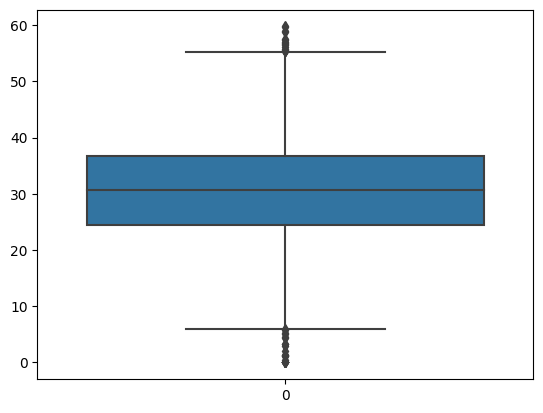

In [ ]:
sns.boxplot(chrn["day.charge"])

<Axes: >

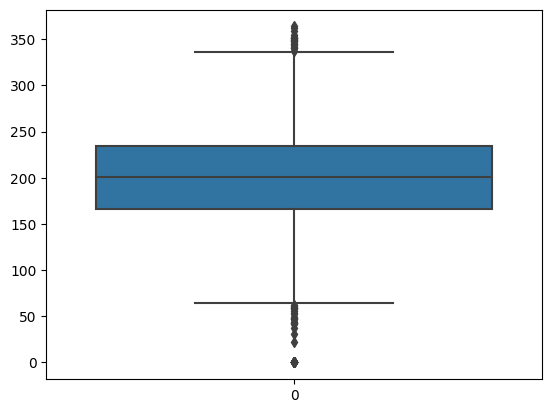

In [ ]:
sns.boxplot(chrn["eve.mins"])

In [ ]:
col1=["day.charge","eve.mins"]

In [ ]:
for col in col1:
    q1 = chrn[col].quantile(0.25)
    q3 = chrn[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    chrn[col] = np.where(chrn[col] > upper_bound, upper_bound, chrn[col])
    chrn[col] = np.where(chrn[col] < lower_bound, lower_bound, chrn[col])

In [ ]:
chrn["day.charge"].median(),chrn["eve.mins"].median()

(30.6, 200.8)

In [ ]:
# replacing Nan values with mean value
chrn2["day.charge"].replace(["Nan"],[30.6],inplace=True)
chrn2["eve.mins"].replace(["Nan"],[200.8],inplace=True)

In [ ]:
#cheakling for duplicates
len(chrn2[chrn2.duplicated()])

0

In [ ]:
chrn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [ ]:
#obs:there are no duplicates in data frame

Text(0.5, 1.0, 'Percentage of Missing values')

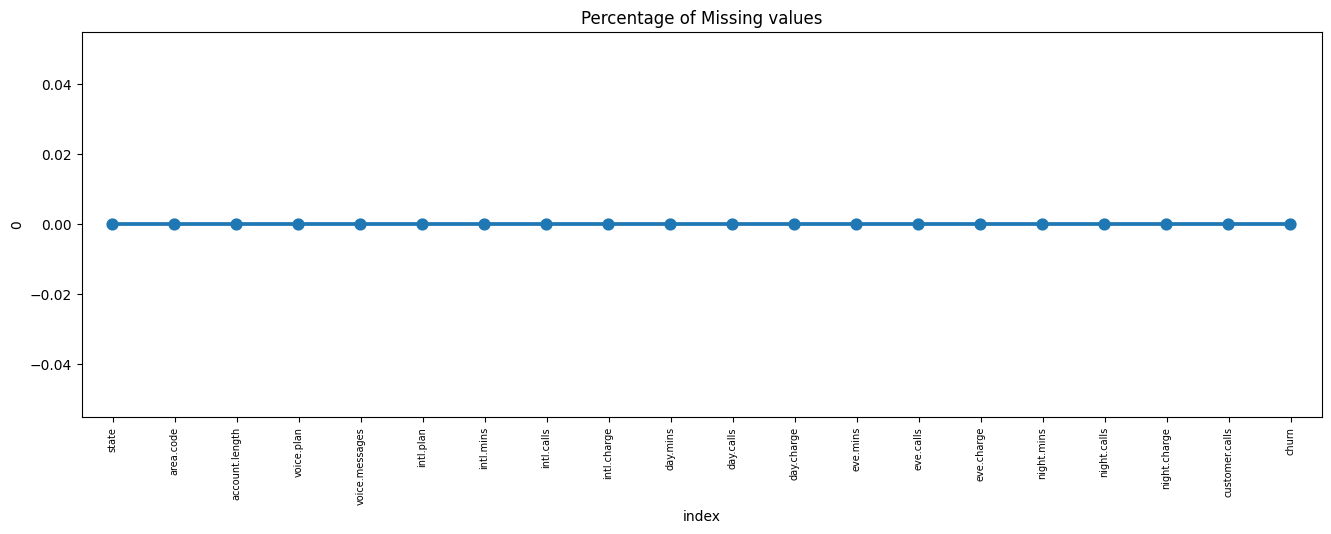

In [ ]:
missing = pd.DataFrame((chrn2.isnull().sum())*100/chrn2.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
#cheaking the count of churn(i.e dependent varible)
churn_counts = chrn2['churn'].value_counts()
print(churn_counts)

no     4293
yes     707
Name: churn, dtype: int64


In [ ]:
#obs:the data highly imbalance and the ratio=86:14

In [ ]:
#finding correlaction
chrn2.corr()

<ipython-input-35-7a1dce830d1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chrn2.corr()


,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
account.length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000798,-0.008682,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice.messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,0.005143,0.018866,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl.mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019283,-0.000351,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl.calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001597,0.007992,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl.charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019213,-0.000328,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day.mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.999769,-0.010906,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day.calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.001667,-0.001722,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
day.charge,-0.000798,0.005143,-0.019283,-0.001597,-0.019213,0.999769,0.001667,1.000000,-0.011529,0.007983,-0.011382,0.011319,0.004207,0.011302,0.002930
eve.mins,-0.008682,0.018866,-0.000351,0.007992,-0.000328,-0.010906,-0.001722,-0.011529,1.000000,0.003115,0.997667,-0.016502,0.015584,-0.016504,-0.012398
eve.calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.007983,0.003115,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


<ipython-input-36-a92e47bae855>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(chrn2.corr(),annot=True)


<Axes: >

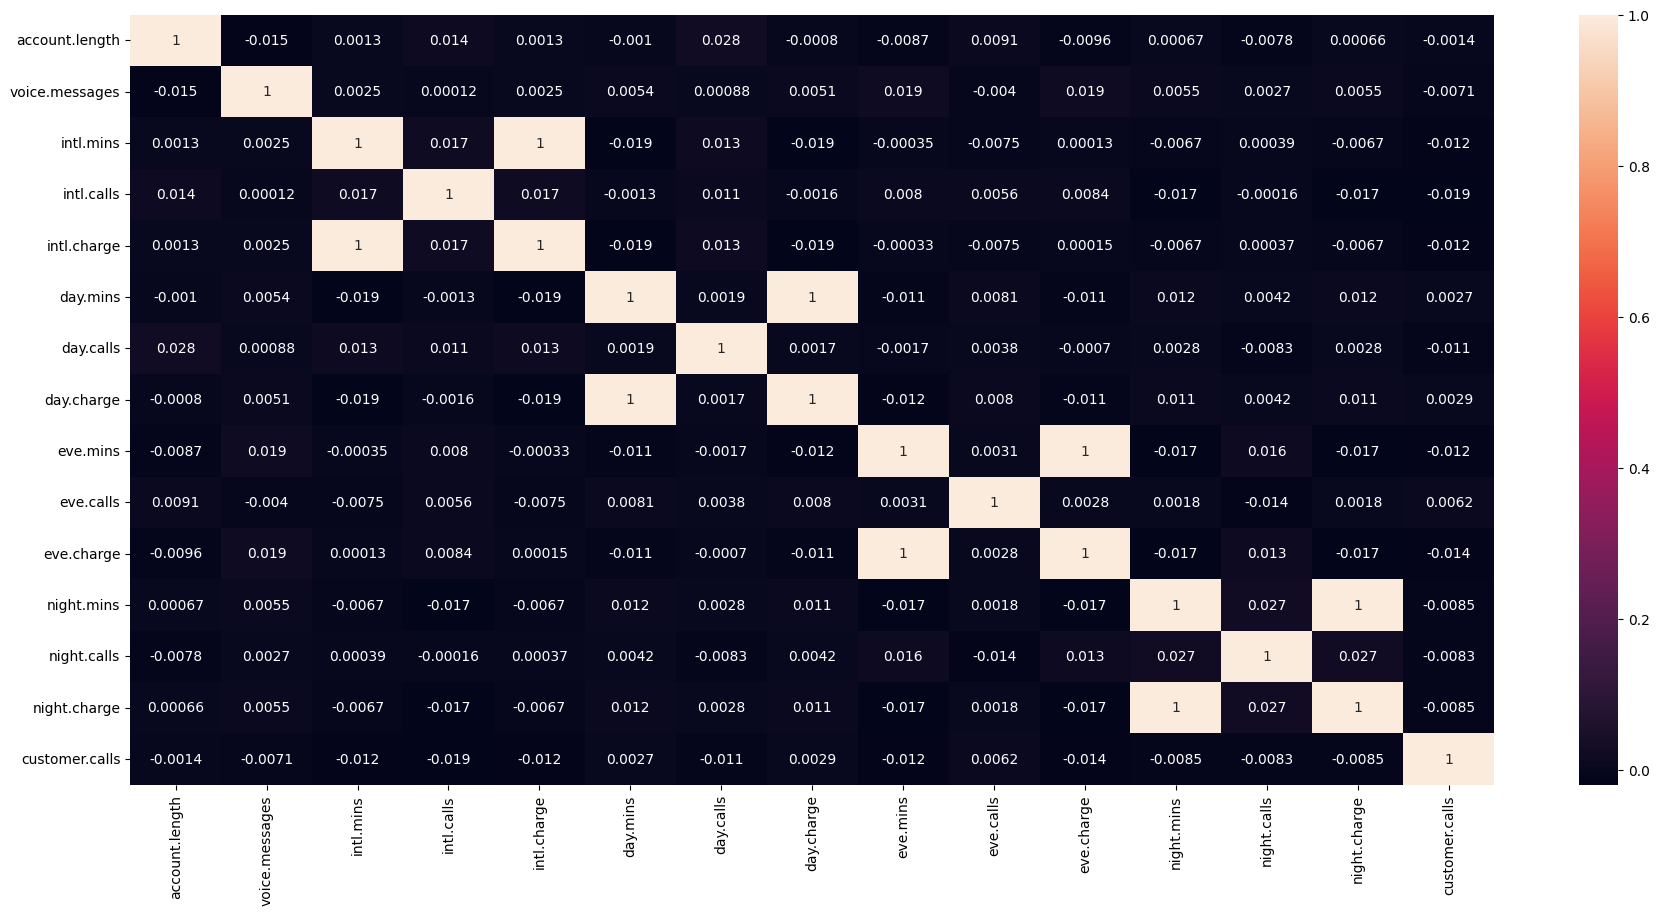

In [ ]:
#heat map for corelation
plt.figure(figsize=(22,10))
sns.heatmap(chrn2.corr(),annot=True)

VISUALIZATION

In [ ]:
#pie chart for % area customers and percentage of churn yes and no
area_labels = ['area_415', 'area_408',"area_510"]
churn_labels = ['No', 'Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=area_labels, values=chrn2['area.code'].value_counts(), name="area.code"),1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=chrn2['churn'].value_counts(), name="Churn"),1, 2)
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(title_text="Area and Churn Distributions",annotations=[dict(text='area.code', x=0.16, y=0.5, font_size=20, showarrow=False),dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.data[0].marker.colors = ('#7fcdff','#326ada')
fig.data[1].marker.colors = ('#56c175','#ff9b35')
fig.show()

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
#state wise churn
state_churn=pd.crosstab(index=chrn2['state'],columns=chrn2['churn'])
state_churn.head(5)

churn,no,yes
state,,
AK,67,5
AL,111,13
AR,76,16
AZ,80,9
CA,38,14


<Axes: xlabel='state'>

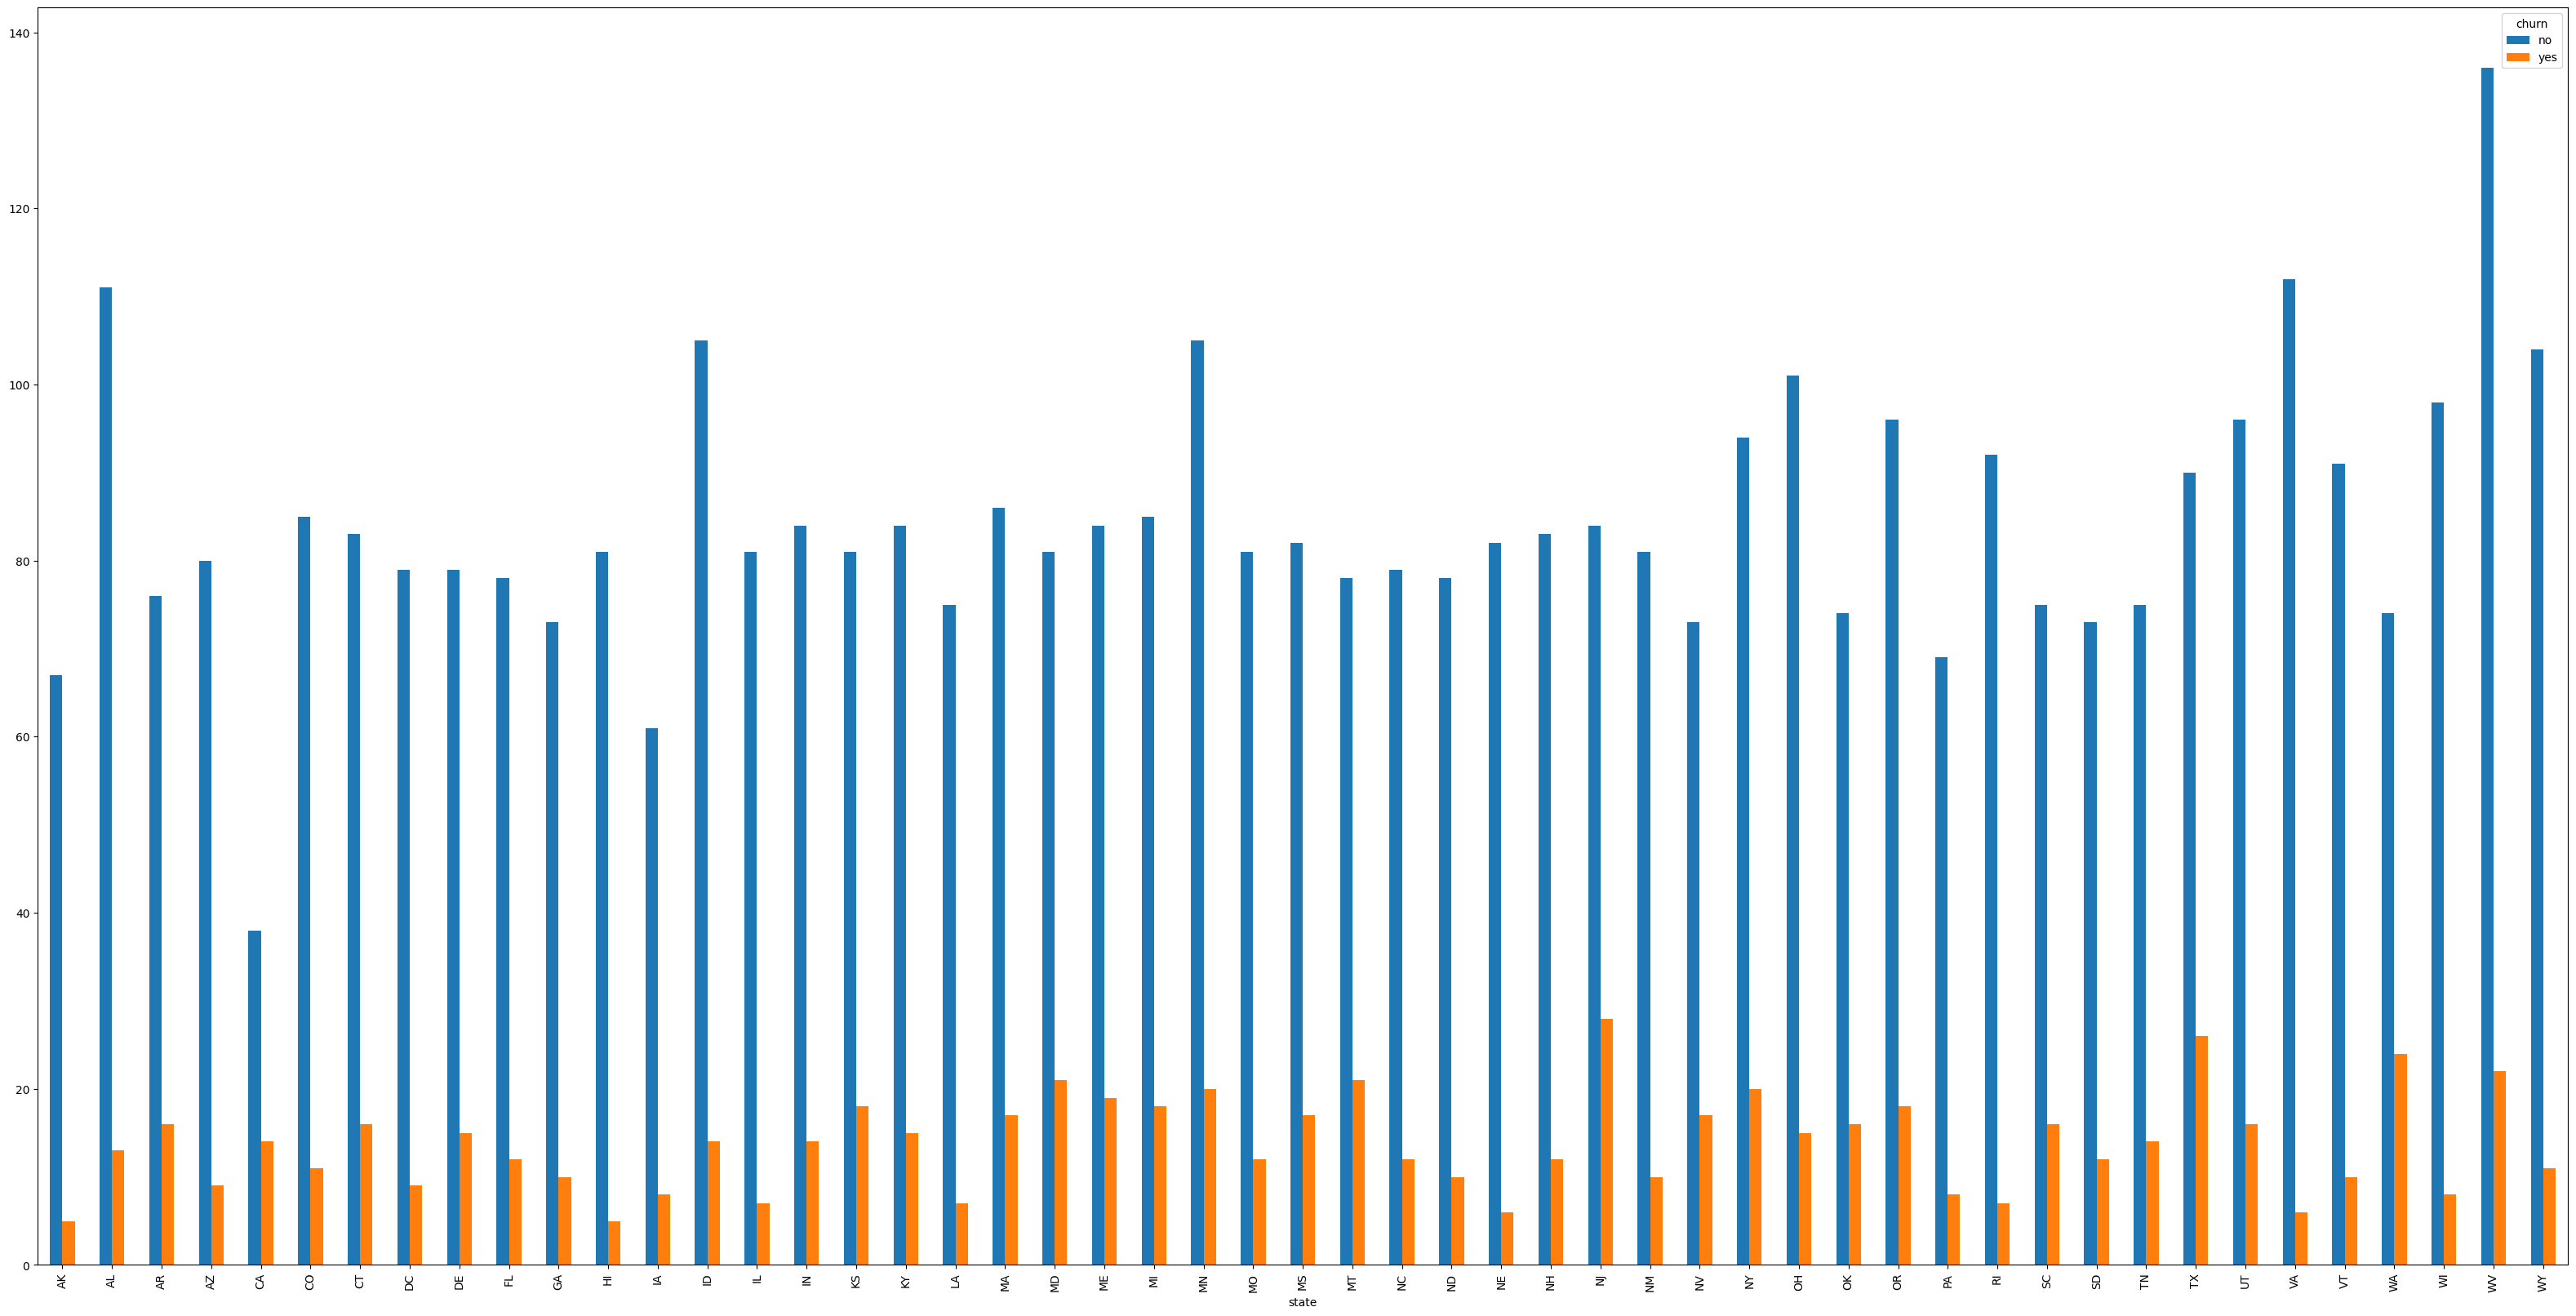

In [ ]:
state_churn.plot(kind="bar",figsize=(40,20))

observation:

The likelihood of churning is higher in states such as "NJ," "TX," "WV," and "WA."

In [ ]:
state_cstrcalls=pd.crosstab(index=chrn2['state'],columns=np.mean(chrn2['customer.calls']))
state_cstrcalls.head(5)

col_0,1.5704
state,
AK,72
AL,124
AR,92
AZ,89
CA,52


<Axes: xlabel='state'>

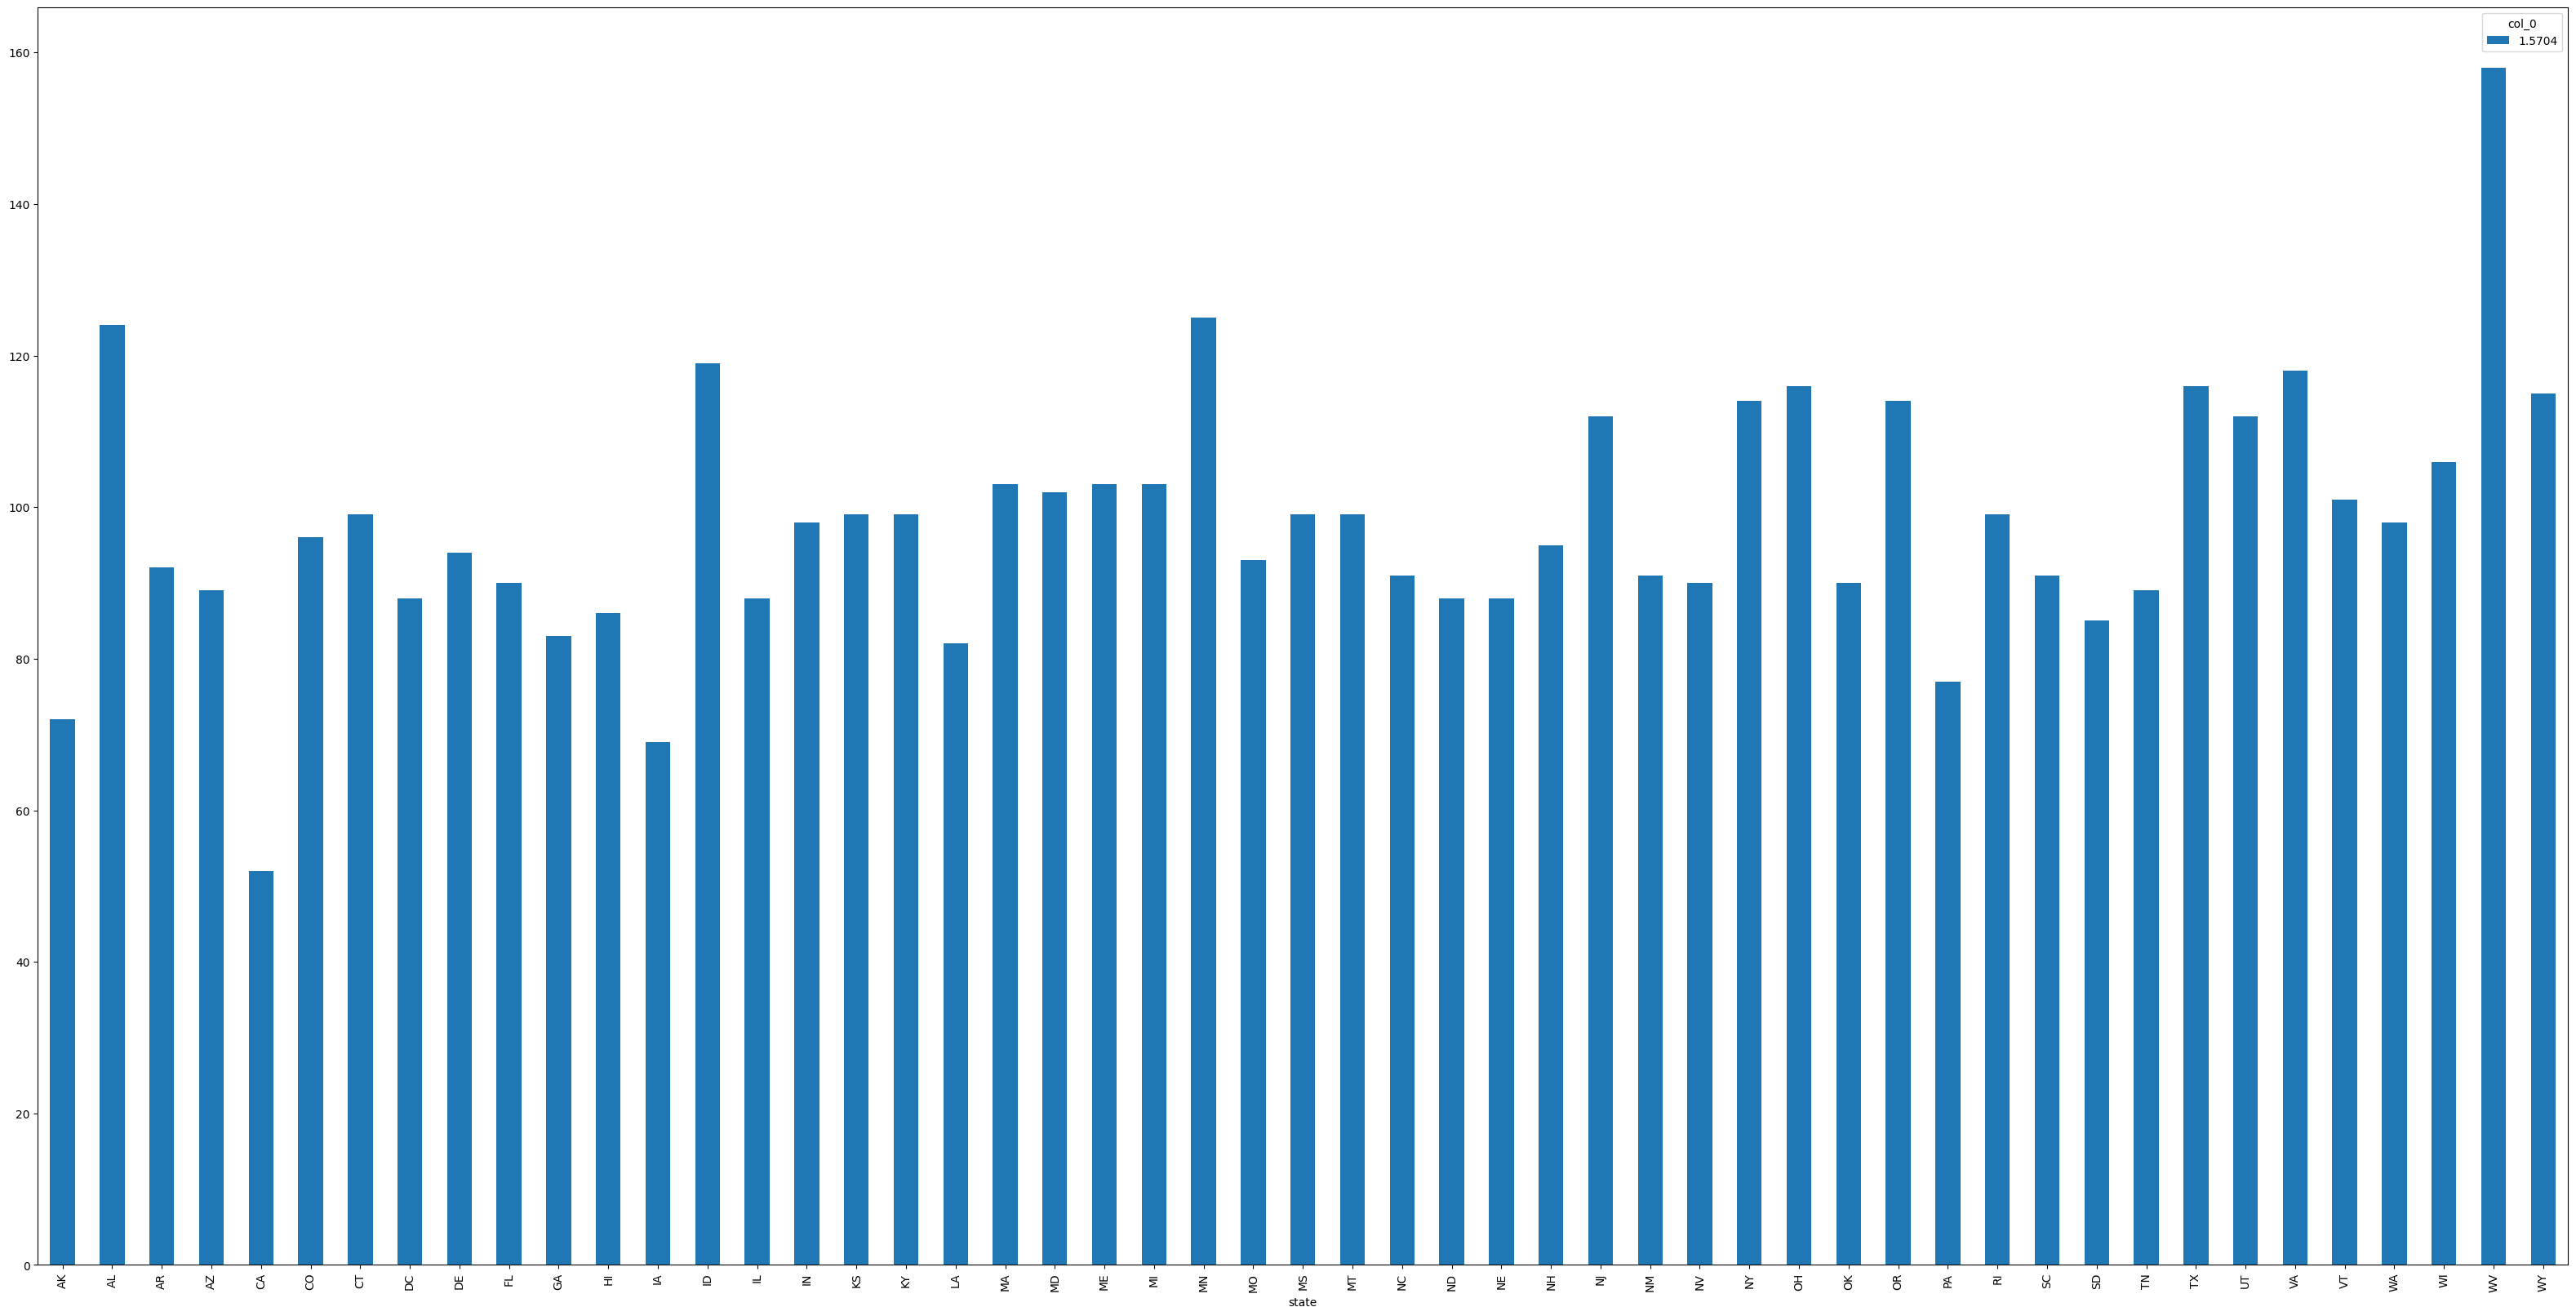

In [ ]:
state_cstrcalls.plot(kind="bar",figsize=(40,20))

In [ ]:
q=chrn2[chrn2["area.code"]=="area_code_415"]
p=(q["churn"].value_counts()/len(q))*100
p

no     86.132265
yes    13.867735
Name: churn, dtype: float64

In [ ]:
q1=chrn2[chrn2["area.code"]=="area_code_408"]
p1=(q1["churn"].value_counts()/len(q1))*100
p1


no     85.941223
yes    14.058777
Name: churn, dtype: float64

In [ ]:
q2=chrn2[chrn2["area.code"]=="area_code_510"]
p2=(q2["churn"].value_counts()/len(q2))*100
p2

no     85.232745
yes    14.767255
Name: churn, dtype: float64

In [ ]:
area={"area":["areacode_415","areacode_408","areacode_510"],"yes":[ 13.867735,14.058777,14.767255],"No":[86.132265,85.941223,85.232745]}
area_df=pd.DataFrame(area)
area_df

,area,yes,No
0,areacode_415,13.867735,86.132265
1,areacode_408,14.058777,85.941223
2,areacode_510,14.767255,85.232745


<Axes: >

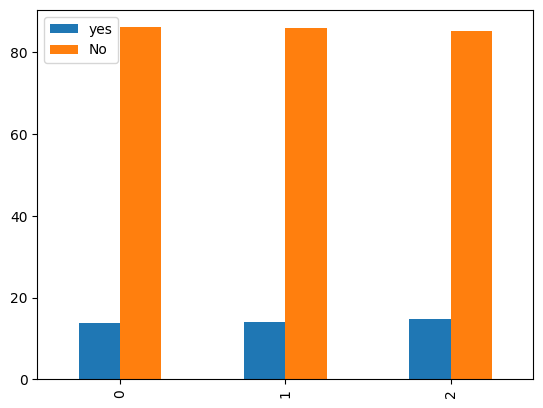

In [ ]:
area_df.plot(kind="bar")

obsevation:

The churn percentages across the three different areas are nearly identical, indicating a consistent pattern. Additionally, the overall likelihood of churn appears to be relatively low in these areas

In [ ]:
#count of the churn where intl.plan=yes
q=chrn2[chrn2["intl.plan"]=="yes"]
p=(q["churn"].value_counts())
p

no     274
yes    199
Name: churn, dtype: int64

In [ ]:
#count of the churn where intl.plan=no
q1=chrn2[chrn2["intl.plan"]=="no"]
q1["churn"].value_counts()

no     4019
yes     508
Name: churn, dtype: int64

In [ ]:
#count of the churn where voice.plan=yes
q2=chrn2[chrn2["voice.plan"]=="yes"]
q2["churn"].value_counts()

no     1221
yes     102
Name: churn, dtype: int64

In [ ]:
#count of the churn where voice.plan=no
q2=chrn2[chrn2["voice.plan"]=="no"]
q2["churn"].value_counts()

no     3072
yes     605
Name: churn, dtype: int64

In [ ]:
#count of the churn where intl.plan,voice.plan=no
q3 = chrn2[(chrn2["voice.plan"] == "no") & (chrn2["intl.plan"] == "no")]
count_no_plans = q3["churn"].value_counts()
print(count_no_plans)

no     2883
yes     452
Name: churn, dtype: int64


In [ ]:
#count of the churn where intl.plan,voice.plan=yes
q4 = chrn2[(chrn2["voice.plan"] == "yes") & (chrn2["intl.plan"] == "yes")]
count_no_plans1 = q4["churn"].value_counts()
print(count_no_plans1)

no     85
yes    46
Name: churn, dtype: int64


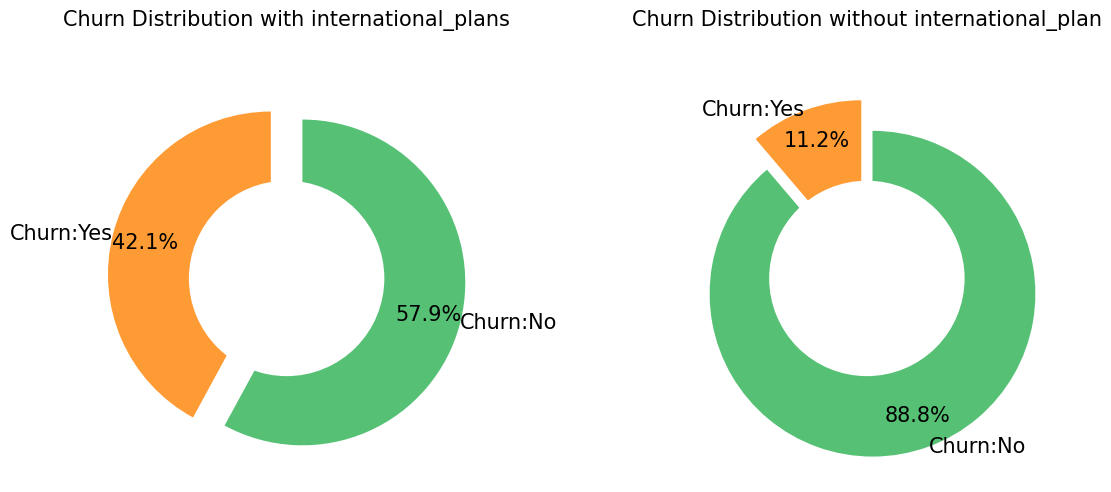

In [ ]:
#pie chart with respect to intl plan
labels = ["Churn:Yes", "Churn:No"]
values = [199, 274]
values1 = [508, 4019]
colors = ['#ff9b35', '#56c175']
explode = (0.1, 0.1)
textprops = {"fontsize": 15}
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for ax, area_code_values, title in zip(axes, [values, values1], [' with international_plans', ' without international_plan']):
    ax.pie(area_code_values,labels=labels,autopct='%1.1f%%',pctdistance=0.8,labeldistance=1,colors=colors,startangle=90,explode=explode,
           radius=1,textprops=textprops,counterclock=True)
    centre_circle = plt.Circle((0, 0), 0.6, color='black', fc='white', linewidth=0)
    ax.add_artist(centre_circle)
    ax.set_title(f"Churn Distribution{title}", fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

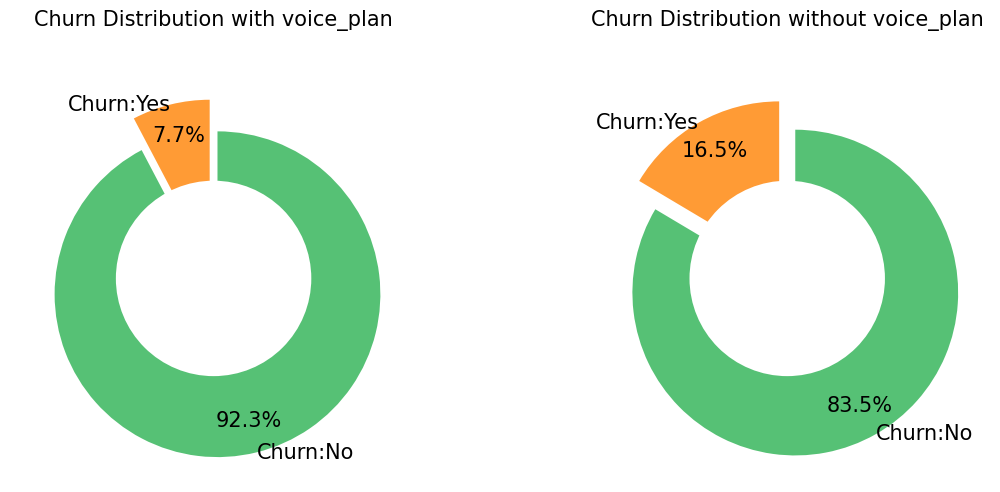

In [ ]:
#churn with respect to voice plan
labels = ["Churn:Yes", "Churn:No"]
values2= [102,1221]
values3=[605,3072]
colors = ['#ff9b35', '#56c175']
explode = (0.1, 0.1)
textprops = {"fontsize": 15}
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for ax, area_code_values, title in zip(axes, [values2,values3], [' with voice_plan',' without voice_plan']):
    ax.pie(area_code_values,labels=labels,autopct='%1.1f%%',pctdistance=0.8,labeldistance=1,colors=colors,startangle=90,explode=explode,radius=1,textprops=textprops,counterclock=True)
    centre_circle = plt.Circle((0, 0), 0.6, color='black', fc='white', linewidth=0)
    ax.add_artist(centre_circle)
    ax.set_title(f"Churn Distribution{title}", fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

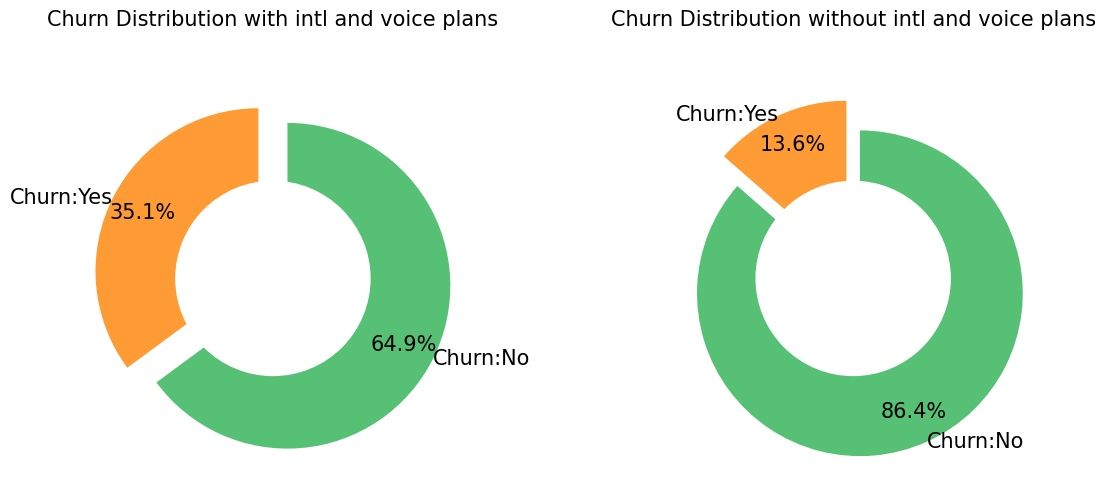

In [ ]:
#with respect to both intl and voice plan
labels = ["Churn:Yes", "Churn:No"]
values4=[452,2883]
values5=[46,85]
colors = ['#ff9b35', '#56c175']
explode = (0.1, 0.1)
textprops = {"fontsize": 15}
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for ax, area_code_values, title in zip(axes, [values5,values4], [' with intl and voice plans',' without intl and voice plans']):
    ax.pie(area_code_values,labels=labels,autopct='%1.1f%%',pctdistance=0.8,labeldistance=1,colors=colors,startangle=90,explode=explode,radius=1,textprops=textprops,counterclock=True)
    centre_circle = plt.Circle((0, 0), 0.6, color='black', fc='white', linewidth=0)
    ax.add_artist(centre_circle)
    ax.set_title(f"Churn Distribution{title}", fontsize=15, y=1.1)
plt.tight_layout()
plt.show()

In [ ]:
#count of the churn where area.code=415
p=chrn[chrn2["area.code"]=="area_code_415"]
p["churn"].value_counts()

no     2149
yes     346
Name: churn, dtype: int64

In [ ]:
##count of the churn where area.code=408
p1=chrn[chrn2["area.code"]=="area_code_408"]
p1["churn"].value_counts()

no     1082
yes     177
Name: churn, dtype: int64

In [ ]:
##count of the churn where area.code=510
p2=chrn[chrn2["area.code"]=="area_code_510"]
p2["churn"].value_counts()

no     1062
yes     184
Name: churn, dtype: int64

<Axes: ylabel='Count'>

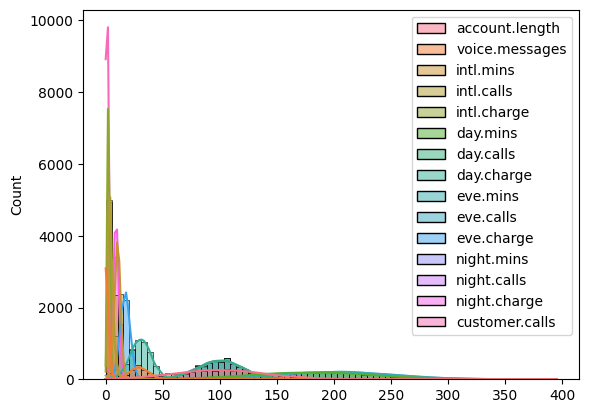

In [ ]:
sns.histplot(chrn2,kde=True)

<Axes: xlabel='account.length', ylabel='day.charge'>

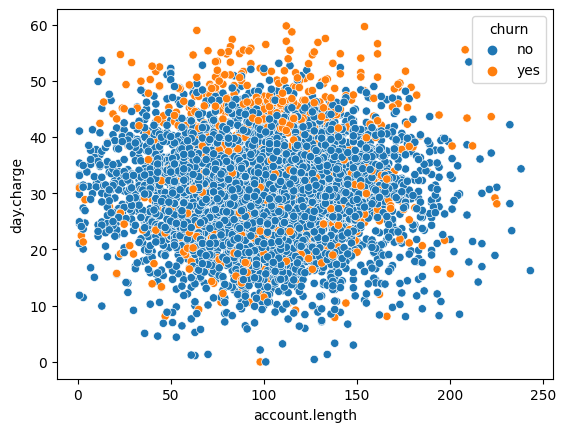

In [ ]:
sns.scatterplot(x="account.length",y="day.charge",data=chrn2,hue="churn")

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [ ]:
chrn2["customer.calls"].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

<Axes: xlabel='churn', ylabel='customer.calls'>

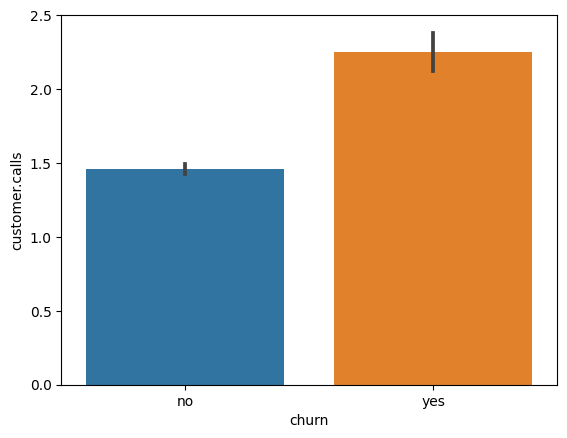

In [ ]:
sns.barplot(y="customer.calls",x="churn",data=chrn2)

<Axes: >

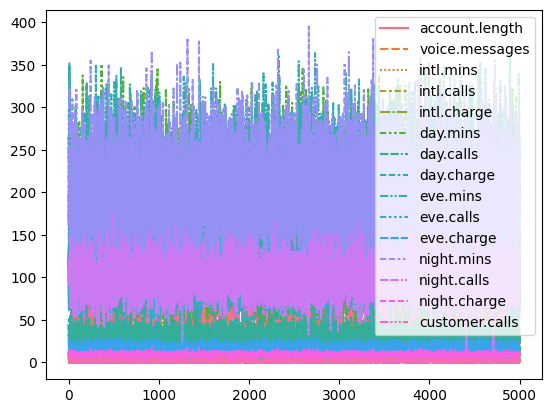

In [ ]:
sns.lineplot(chrn2)

Data preprocessing

In [ ]:
#encoding
le=LabelEncoder()
chrn2["state"]=le.fit_transform(chrn2["state"])
chrn2["area.code"]=le.fit_transform(chrn2["area.code"])
chrn2["voice.plan"]=le.fit_transform(chrn2["voice.plan"])
chrn2["intl.plan"]=le.fit_transform(chrn2["intl.plan"])
chrn2["churn"]=le.fit_transform(chrn2["churn"])

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [ ]:
chrn2.corr()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
state,1.000000,0.011491,0.010334,-0.030075,-0.027282,0.007422,-0.009313,0.009898,-0.009322,0.007334,-0.008166,0.007350,0.003598,-0.005458,0.003896,0.009538,-0.001699,0.009532,-0.012997,0.006946
area.code,0.011491,1.000000,-0.023462,0.004125,0.002249,0.029187,0.009231,-0.008666,0.009141,-0.000812,-0.004255,-0.001217,0.002343,-0.013035,0.001787,0.015911,0.019000,0.015907,0.011555,0.007167
account.length,0.010334,-0.023462,1.000000,-0.006650,-0.014575,0.014681,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000798,-0.008682,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445,0.021203
voice.plan,-0.030075,0.004125,-0.006650,1.000000,0.954508,0.009054,0.004116,-0.007525,0.004165,0.002059,-0.001735,0.001810,0.022981,-0.005916,0.023332,0.005524,0.009176,0.005522,-0.014453,-0.110698
voice.messages,-0.027282,0.002249,-0.014575,0.954508,1.000000,0.011947,0.002463,0.000124,0.002505,0.005381,0.000883,0.005143,0.018866,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086,-0.097633
intl.plan,0.007422,0.029187,0.014681,0.009054,0.011947,1.000000,0.031799,0.004493,0.031751,0.028138,0.008102,0.028015,0.019944,0.002505,0.021234,-0.026508,0.005623,-0.026510,-0.012974,0.259123
intl.mins,-0.009313,0.009231,0.001291,0.004116,0.002463,0.031799,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019283,-0.000351,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122,0.063285
intl.calls,0.009898,-0.008666,0.014277,-0.007525,0.000124,0.004493,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001597,0.007992,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147,-0.046893
intl.charge,-0.009322,0.009141,0.001292,0.004165,0.002505,0.031751,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019213,-0.000328,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180,0.063275
day.mins,0.007334,-0.000812,-0.001017,0.002059,0.005381,0.028138,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.999769,-0.010906,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733,0.207705


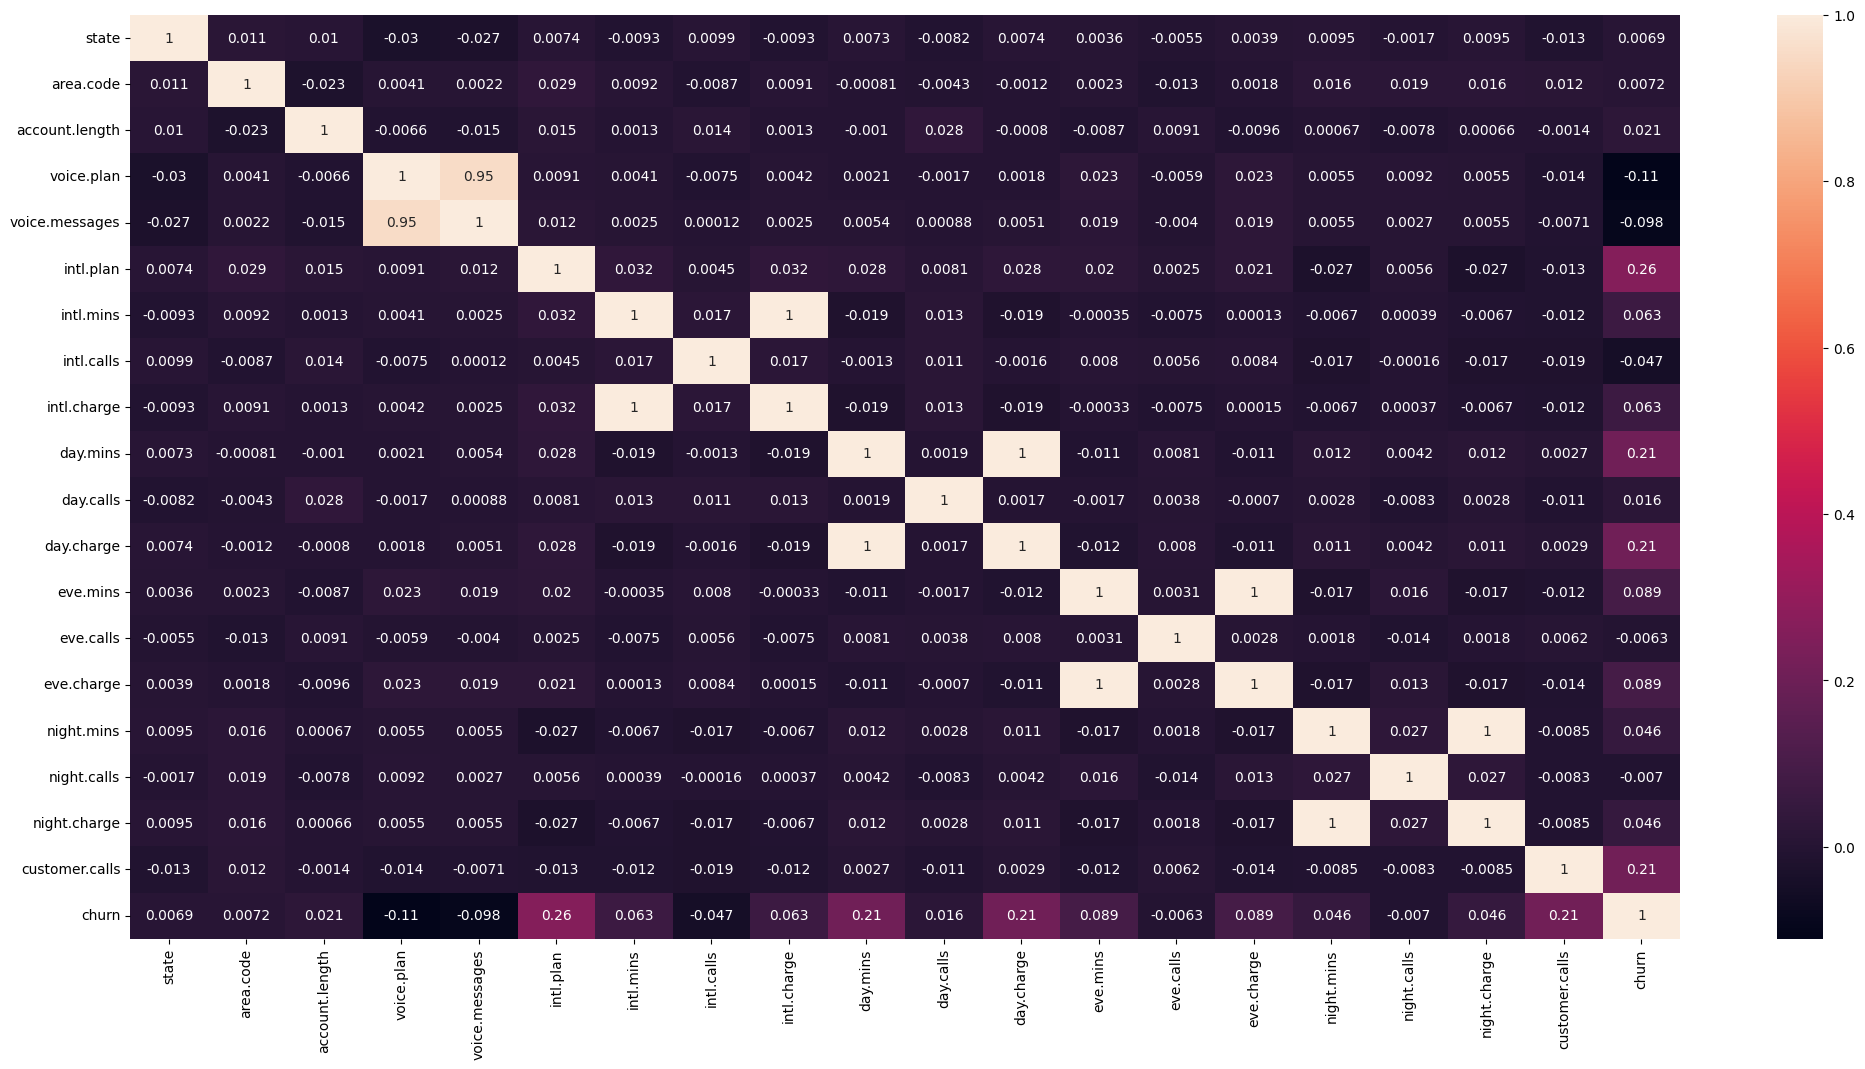

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(chrn2.corr(),annot=True)
plt.show()

<Axes: >

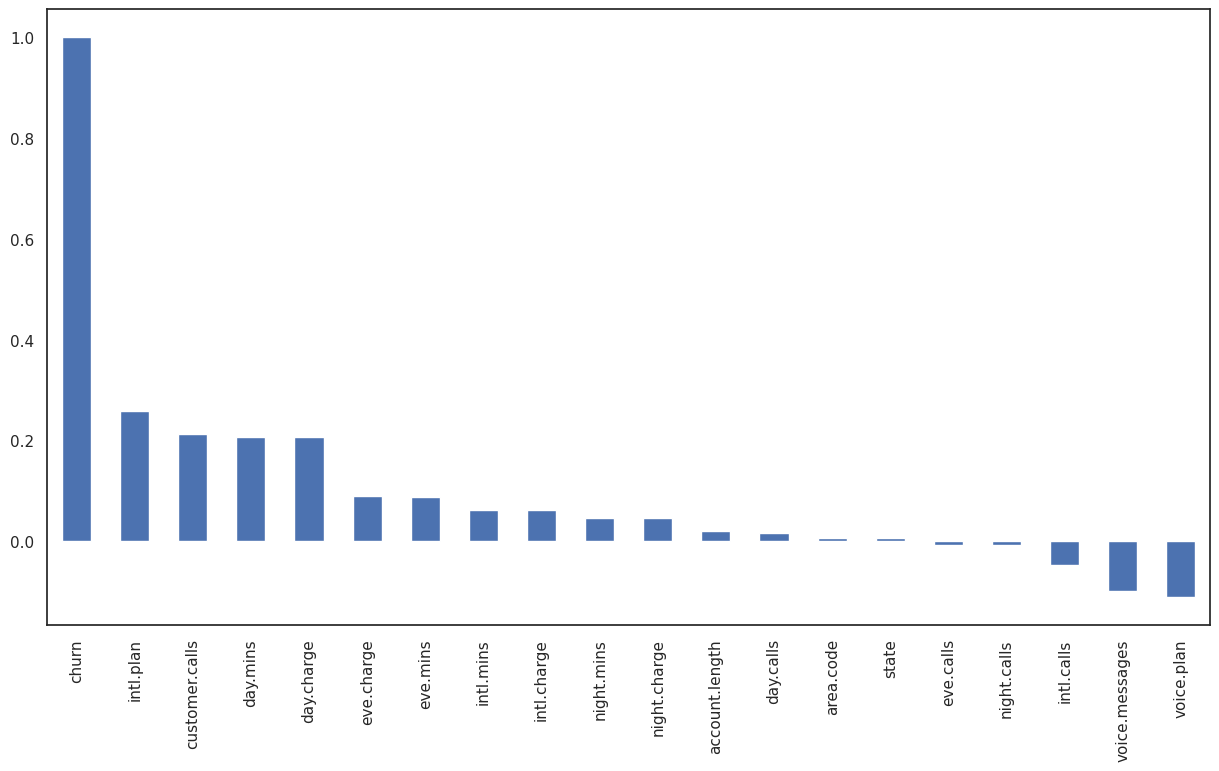

In [ ]:
#Correlation of "Churn" with Features:
plt.figure(figsize=(15,8))
sns.set(style = 'white')
chrn2.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

observation:
1. High Churn seen in case of inti.plan,customer.calls,day.mins,day.charge
2.   voice.plans,voice.msg,intl.calls are negatively correlated with churn
3. Factors like state,eve.calls,night.calls,area.code have alomost NO impact on Churn
4. Features with a high positive correlation are likely to be associated with a higher risk of churn, while features with a high negative correlation are likely to be associated with a lower risk of churn.



In [ ]:
co=['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls']

In [ ]:
#scaling by standard scaler
sc=StandardScaler()
chrn2[co]=sc.fit_transform(chrn2[co])

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,-0.675476,0.003673,0.698941,1.667120,1.273145,-0.323240,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574030,-0.063087,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.436676,0
1,0.608134,0.003673,0.169849,1.667120,1.346973,-0.323240,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347573,-0.100765,0.141693,-0.101089,1.068992,0.154374,1.069818,-0.436676,0
2,0.337900,0.003673,0.925695,-0.599837,-0.572549,-0.323240,0.701969,0.229917,0.695971,1.171125,0.704546,1.171149,-1.574150,0.494791,-1.572084,-0.748012,0.204483,-0.746737,-1.202236,0
3,0.608134,-1.409138,-0.409634,-0.599837,-0.572549,3.093675,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210561,-2.750082,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,0.328885,0
4,0.675692,0.003673,-0.636388,-0.599837,-0.572549,3.093675,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252584,-1.036751,1.100103,-1.034426,-0.267041,1.056327,-0.267307,1.094445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.013268,-1.409138,-1.266260,1.667120,2.380562,-0.323240,-0.131027,0.229917,-0.135754,1.028239,1.360145,1.028120,0.444566,1.301873,0.443551,1.922073,0.805785,1.923114,0.328885,0
4996,1.553952,0.003673,1.303619,-0.599837,-0.572549,-0.323240,1.607399,-0.991312,1.608185,0.072577,-0.505789,0.071686,1.114827,-1.371585,1.111550,0.261434,0.655459,0.260505,1.094445,1
4997,-1.283502,0.003673,-0.989116,-0.599837,-0.572549,-0.323240,1.209010,-0.177160,1.205738,-0.736489,-0.556220,-0.737352,-0.550911,1.402758,-0.550301,0.237683,-0.146277,0.238513,-0.436676,0
4998,-1.283502,1.416484,0.220239,-0.599837,-0.572549,-0.323240,-0.638067,0.636993,-0.632105,0.157937,-1.665694,0.157940,-0.572724,-0.413175,-0.573577,0.475200,-0.547145,0.476029,-1.202236,0


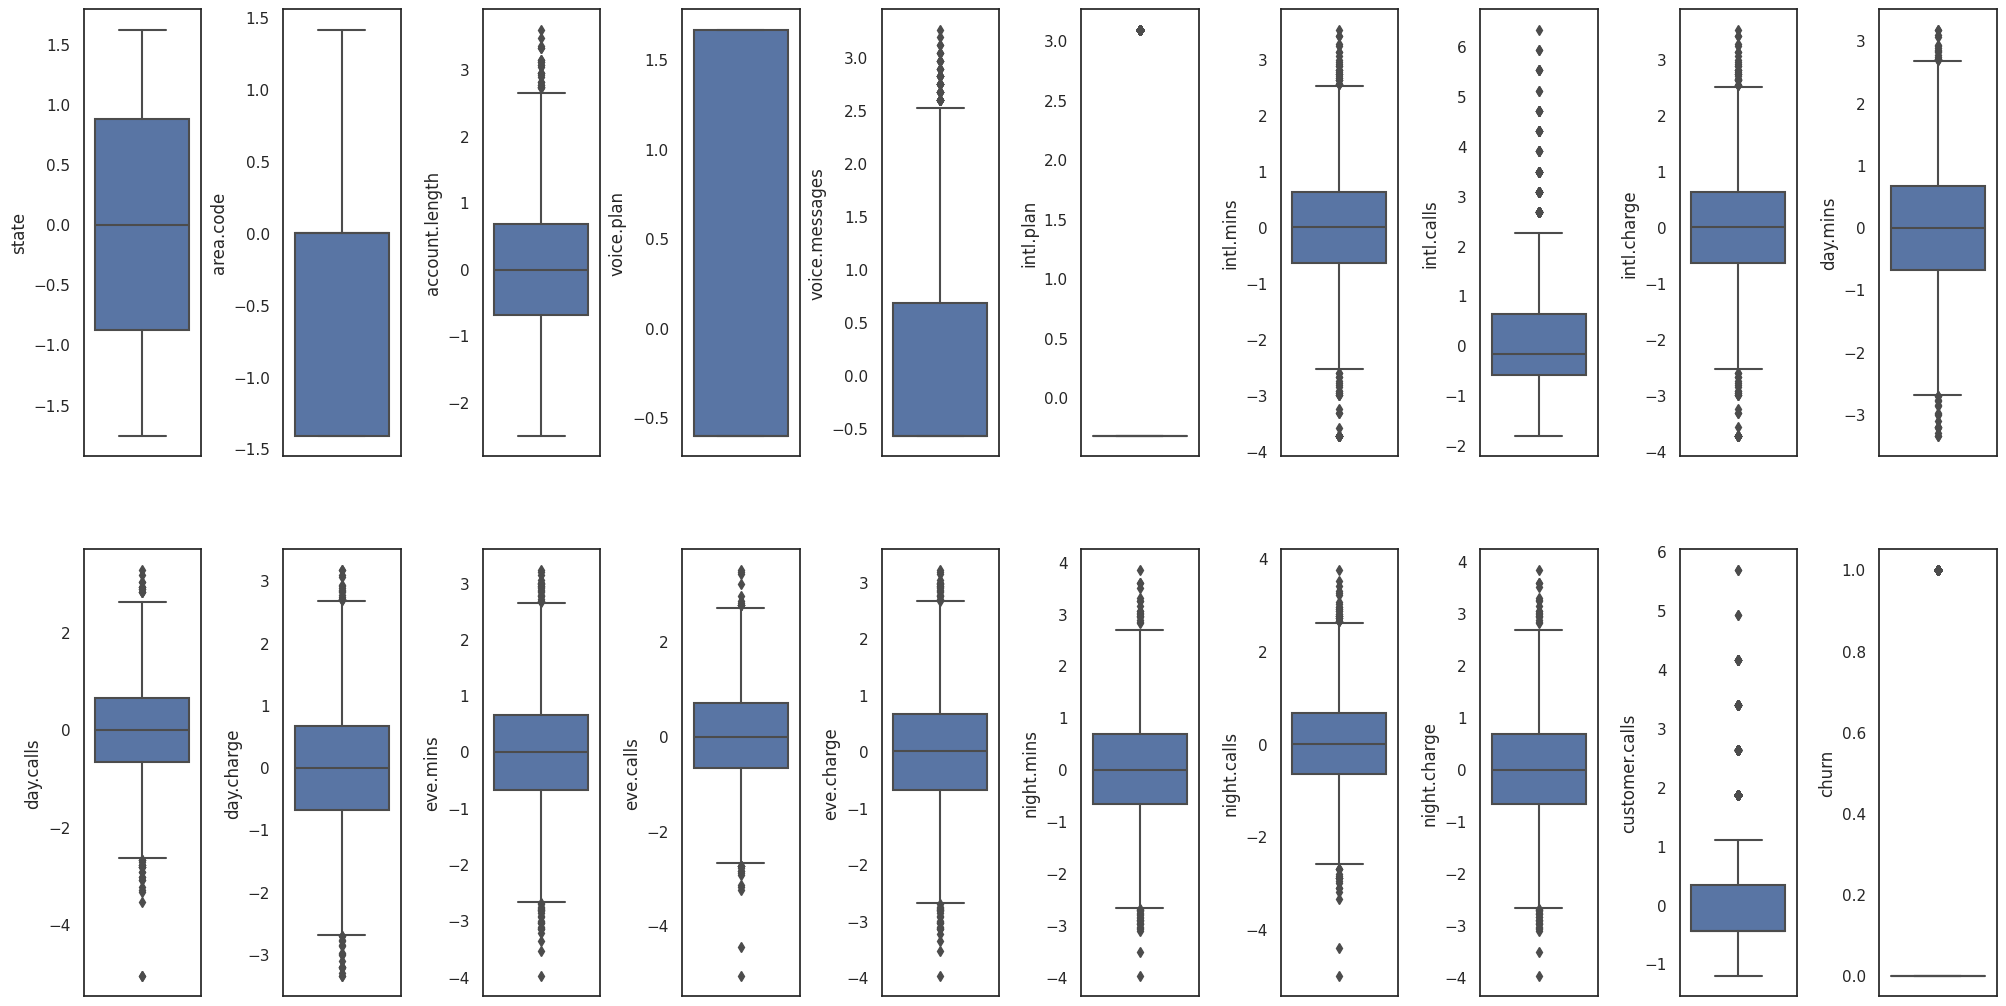

In [ ]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in chrn2.items():
    sns.boxplot(y=k, data= chrn2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
column1=['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls',]

In [ ]:
# Replace outliers with the upper and lower bounds
for col in column1:
    q1 = chrn2[col].quantile(0.25)
    q3 = chrn2[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    chrn2[col] = np.where(chrn2[col] > upper_bound, upper_bound, chrn2[col])
    chrn2[col] = np.where(chrn2[col] < lower_bound, lower_bound, chrn2[col])

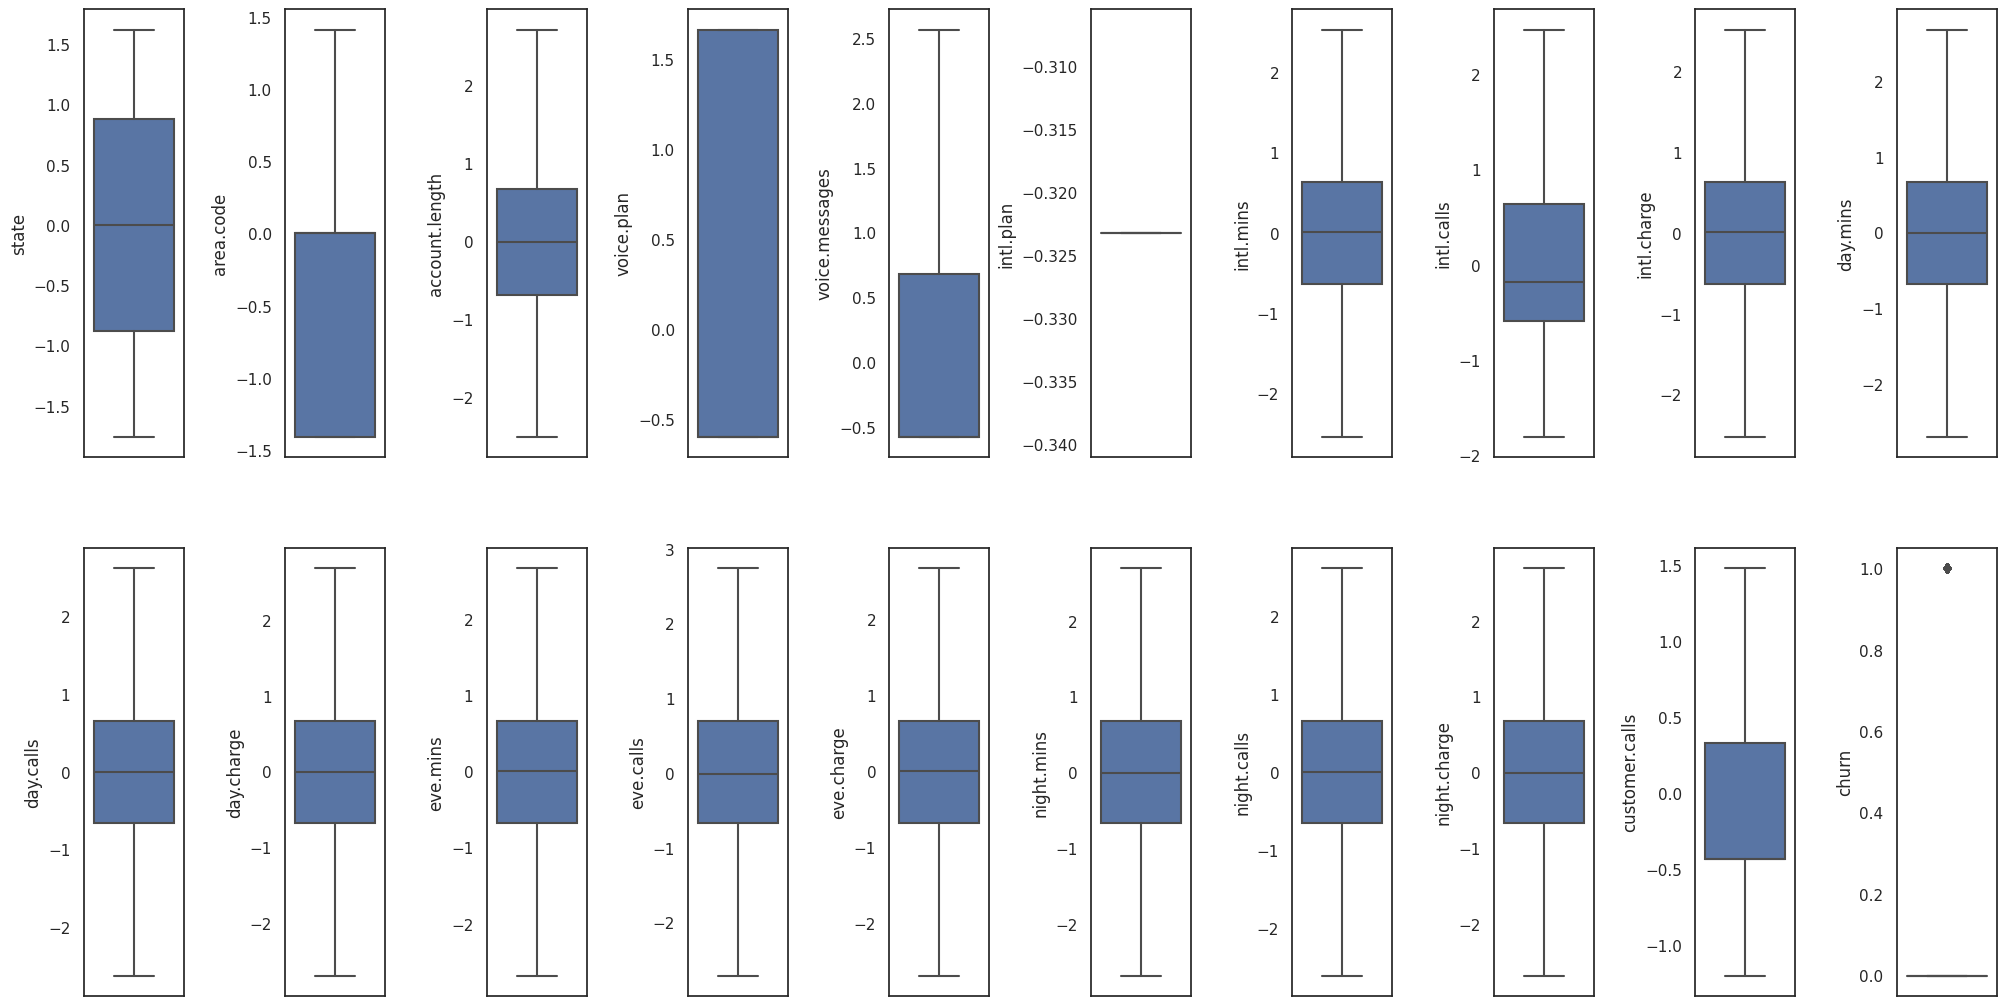

In [ ]:
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in chrn2.items():
    sns.boxplot(y=k, data= chrn2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

ISOLATION FOREST

In [ ]:
# Row wise outlier detection by Isolation Forest
If=IsolationForest(contamination=0.005,random_state=21)
Imodel=If.fit(chrn2)
Iypred=If.predict(chrn2)
a=pd.DataFrame(Iypred)
b=a[a[0]==-1].index
a[a[0]==-1].index
#droping the rows which has outliers
chrn2.drop(b,axis=0,inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Int64Index([  15,   41,   57,  115,  250,  473,  514,  547,  616,  646,  911,
            1821, 1904, 2212, 2468, 2994, 3075, 3174, 3212, 3247, 3431, 3767,
            3826, 4018, 4371],
           dtype='int64')

In [ ]:
chrn2.drop(b,axis=0,inplace=True)#droping the rows which has outliers

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,-0.675476,0.003673,0.698941,1.667120,1.273145,-0.32324,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574030,-0.063087,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.436676,0
1,0.608134,0.003673,0.169849,1.667120,1.346973,-0.32324,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347573,-0.100765,0.141693,-0.101089,1.068992,0.154374,1.069818,-0.436676,0
2,0.337900,0.003673,0.925695,-0.599837,-0.572549,-0.32324,0.701969,0.229917,0.695971,1.171125,0.704546,1.171149,-1.574150,0.494791,-1.572084,-0.748012,0.204483,-0.746737,-1.202236,0
3,0.608134,-1.409138,-0.409634,-0.599837,-0.572549,-0.32324,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210561,-2.675718,-0.614946,-2.689295,-0.069110,-0.547145,-0.069377,0.328885,0
4,0.675692,0.003673,-0.636388,-0.599837,-0.572549,-0.32324,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252584,-1.036751,1.100103,-1.034426,-0.267041,1.056327,-0.267307,1.094445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.013268,-1.409138,-1.266260,1.667120,2.380562,-0.32324,-0.131027,0.229917,-0.135754,1.028239,1.360145,1.028120,0.444566,1.301873,0.443551,1.922073,0.805785,1.923114,0.328885,0
4996,1.553952,0.003673,1.303619,-0.599837,-0.572549,-0.32324,1.607399,-0.991312,1.608185,0.072577,-0.505789,0.071686,1.114827,-1.371585,1.111550,0.261434,0.655459,0.260505,1.094445,1
4997,-1.283502,0.003673,-0.989116,-0.599837,-0.572549,-0.32324,1.209010,-0.177160,1.205738,-0.736489,-0.556220,-0.737352,-0.550911,1.402758,-0.550301,0.237683,-0.146277,0.238513,-0.436676,0
4998,-1.283502,1.416484,0.220239,-0.599837,-0.572549,-0.32324,-0.638067,0.636993,-0.632105,0.157937,-1.665694,0.157940,-0.572724,-0.413175,-0.573577,0.475200,-0.547145,0.476029,-1.202236,0


In [ ]:
pps.matrix(chrn2) #dependancy value between the variables

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,state,state,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,state,area.code,0.000000,regression,True,mean absolute error,0.705696,0.753412,DecisionTreeRegressor()
2,state,account.length,0.000000,regression,True,mean absolute error,0.796113,0.804310,DecisionTreeRegressor()
3,state,voice.plan,0.000000,regression,True,mean absolute error,0.594193,0.878971,DecisionTreeRegressor()
4,state,voice.messages,0.000000,regression,True,mean absolute error,0.562649,0.833450,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
395,churn,night.mins,0.000805,regression,True,mean absolute error,0.792215,0.791577,DecisionTreeRegressor()
396,churn,night.calls,0.000000,regression,True,mean absolute error,0.791009,0.791463,DecisionTreeRegressor()
397,churn,night.charge,0.000810,regression,True,mean absolute error,0.792220,0.791578,DecisionTreeRegressor()
398,churn,customer.calls,0.000000,regression,True,mean absolute error,0.683618,0.717392,DecisionTreeRegressor()


In [ ]:
chrn2.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [ ]:
#Segmenting into dependent and independent variables
x=chrn2.iloc[:,:-1]
y=chrn2.iloc[:,-1]


FEATURE ENGINEERING

In [ ]:
#feature selection by using select k best
fmodel=SelectKBest(score_func=f_classif,k=10)
fmodel_fit=fmodel.fit(x,y)
d={"columns":x.columns,"scores":fmodel_fit.scores_}
df=pd.DataFrame(d)
df.sort_values("scores",ascending=False)

,columns,scores
9,day.mins,223.755292
11,day.charge,223.456011
18,customer.calls,121.411396
3,voice.plan,70.286062
4,voice.messages,57.904511
14,eve.charge,38.447173
12,eve.mins,38.296775
6,intl.mins,21.941277
8,intl.charge,21.919762
7,intl.calls,17.912468


In [ ]:
dmodel=DecisionTreeClassifier()
dmodel.fit(x,y)
dmodel.feature_importances_
d1={"columns":x.columns,"scores":dmodel.feature_importances_}
df1=pd.DataFrame(d1)
df1.sort_values("scores",ascending=False)

,columns,scores
9,day.mins,0.223963
18,customer.calls,0.099317
14,eve.charge,0.097678
4,voice.messages,0.071468
11,day.charge,0.065544
12,eve.mins,0.063679
15,night.mins,0.060525
8,intl.charge,0.044157
6,intl.mins,0.040279
10,day.calls,0.039347


In [ ]:
rmodel=RandomForestClassifier()
rmodel.fit(x,y)
rmodel.feature_importances_
d2={"columns":x.columns,"scores":rmodel.feature_importances_}
df2=pd.DataFrame(d2)
df2.sort_values("scores",ascending=False)

,columns,scores
11,day.charge,0.166997
9,day.mins,0.145875
18,customer.calls,0.111524
14,eve.charge,0.072752
12,eve.mins,0.071106
15,night.mins,0.050860
17,night.charge,0.046831
2,account.length,0.039312
6,intl.mins,0.036732
10,day.calls,0.035929


In [ ]:
chrn2.drop("intl.plan",axis=1,inplace=True)

In [ ]:
chrn2

,state,area.code,account.length,voice.plan,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,-0.675476,0.003673,0.698941,1.667120,1.273145,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574030,-0.063087,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.436676,0
1,0.608134,0.003673,0.169849,1.667120,1.346973,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347573,-0.100765,0.141693,-0.101089,1.068992,0.154374,1.069818,-0.436676,0
2,0.337900,0.003673,0.925695,-0.599837,-0.572549,0.701969,0.229917,0.695971,1.171125,0.704546,1.171149,-1.574150,0.494791,-1.572084,-0.748012,0.204483,-0.746737,-1.202236,0
3,0.608134,-1.409138,-0.409634,-0.599837,-0.572549,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210561,-2.675718,-0.614946,-2.689295,-0.069110,-0.547145,-0.069377,0.328885,0
4,0.675692,0.003673,-0.636388,-0.599837,-0.572549,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252584,-1.036751,1.100103,-1.034426,-0.267041,1.056327,-0.267307,1.094445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.013268,-1.409138,-1.266260,1.667120,2.380562,-0.131027,0.229917,-0.135754,1.028239,1.360145,1.028120,0.444566,1.301873,0.443551,1.922073,0.805785,1.923114,0.328885,0
4996,1.553952,0.003673,1.303619,-0.599837,-0.572549,1.607399,-0.991312,1.608185,0.072577,-0.505789,0.071686,1.114827,-1.371585,1.111550,0.261434,0.655459,0.260505,1.094445,1
4997,-1.283502,0.003673,-0.989116,-0.599837,-0.572549,1.209010,-0.177160,1.205738,-0.736489,-0.556220,-0.737352,-0.550911,1.402758,-0.550301,0.237683,-0.146277,0.238513,-0.436676,0
4998,-1.283502,1.416484,0.220239,-0.599837,-0.572549,-0.638067,0.636993,-0.632105,0.157937,-1.665694,0.157940,-0.572724,-0.413175,-0.573577,0.475200,-0.547145,0.476029,-1.202236,0


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)
print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

Before OverSampling, counts of label '1': 692
Before OverSampling, counts of label '0': 4283 

After OverSampling, the shape of train_X: (6884, 19)
After OverSampling, the shape of train_y: (6884,) 

After OverSampling, counts of label '1': 4213
After OverSampling, counts of label '0': 2671


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_resampled,y_resampled,random_state=21,test_size=0.1)
kf=KFold(5)

Logistic regression model

In [ ]:
log_model=LogisticRegression()
log_model.fit(xtrain,ytrain)
log_modelpred=log_model.predict(xtest)
log_modelpred_tr=log_model.predict(xtrain)
log_tsacc=accuracy_score(log_modelpred,ytest)
log_tracc=accuracy_score(log_modelpred_tr,ytrain)
print(" Test accuracy of logistic model:",accuracy_score(log_modelpred,ytest))
print(" Train accuracy of logistic model:",accuracy_score(log_modelpred_tr,ytrain))
print("confusion matrix of logistic model:\n",confusion_matrix(log_modelpred,ytest))
print("classification report of logistic model:\n",classification_report(log_modelpred,ytest))
f1 = f1_score(ytest,log_modelpred)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(log_modelpred))**2)))


 Test accuracy of logistic model: 0.7343976777939042
 Train accuracy of logistic model: 0.7578692493946732
confusion matrix of logistic model:
 [[165  62]
 [121 341]]
classification report of logistic model:
               precision    recall  f1-score   support

           0       0.58      0.73      0.64       227
           1       0.85      0.74      0.79       462

    accuracy                           0.73       689
   macro avg       0.71      0.73      0.72       689
weighted avg       0.76      0.73      0.74       689

F1 score: 0.7884393063583814
error 0.5153662020409331


Decision Tree model

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_dt=model_dt.predict(xtest)
y_pred_dtr=model_dt.predict(xtrain)
dt_tsacc=accuracy_score(ytest, y_pred_dt)
dt_tracc=accuracy_score(ytrain, y_pred_dtr)
print(" Test Accuracy of DecisionTreeClassifier model:", accuracy_score(ytest, y_pred_dt))
print(" Train Accuracy of DecisionTreeClassifier model:", accuracy_score(ytrain, y_pred_dtr))
print("Confusion matrix of DecisionTreeClassifier model:\n", confusion_matrix(ytest, y_pred_dt))
print("classification_report of DecisionTreeClassifier model:\n",classification_report(ytest, y_pred_dt, labels=[0,1]))
f1 = f1_score(ytest, y_pred_dt)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_dt))**2)))

 Test Accuracy of DecisionTreeClassifier model: 0.8592162554426706
 Train Accuracy of DecisionTreeClassifier model: 0.8736077481840193
Confusion matrix of DecisionTreeClassifier model:
 [[247  39]
 [ 58 345]]
classification_report of DecisionTreeClassifier model:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       286
           1       0.90      0.86      0.88       403

    accuracy                           0.86       689
   macro avg       0.85      0.86      0.86       689
weighted avg       0.86      0.86      0.86       689

F1 score: 0.8767471410419314
error 0.37521159971052265


Hyperparameter Tuning for  Decision tree

In [ ]:
#Hyperparameter Tuning for  Decision tree
params_dt = { 'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2, 4,10],}
grid_dt= GridSearchCV(estimator=model_dt, param_grid=params_dt, cv=kf)
grid_dt.fit(xtrain, ytrain)
y_pred_grid_dt = grid_dt.predict(xtest)
y_pred_grid_dtr = grid_dt.predict(xtrain)
dtgd_tsacc=accuracy_score(ytest, y_pred_grid_dt)
dtgd_tracc= accuracy_score(ytrain, y_pred_grid_dtr)
print('Decision tree tuned  Test Accuracy:', accuracy_score(ytest, y_pred_grid_dt))
print('Decision tree tuned  Train Accuracy:', accuracy_score(ytrain, y_pred_grid_dtr))
print('Decision tree Best Parameters:', grid_dt.best_params_)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_grid_dt))**2)))

Decision tree tuned  Test Accuracy: 0.888243831640058
Decision tree tuned  Train Accuracy: 0.9990314769975787
Decision tree Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1}
error 0.33429951893465526


Random Forest Classifier model

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_rf = model_rf.predict(xtest)
y_pred_rf_tr= model_rf.predict(xtrain)
rf_tsacc= accuracy_score(ytest, y_pred_rf)
rf_tracc=accuracy_score(ytrain, y_pred_rf_tr)
print("Test Accuracy of random forest model:", accuracy_score(ytest, y_pred_rf))
print("Train Accuracy of random forest model:", accuracy_score(ytrain, y_pred_rf_tr))
print("Confusion matrix of random forest model:\n", confusion_matrix(ytest, y_pred_rf))
print("classification_report of random forest  model:\n",classification_report(ytest, y_pred_rf, labels=[0,1]))
f1 = f1_score(ytest, y_pred_rf)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_rf ))**2)))

Test Accuracy of random forest model: 0.8896952104499274
Train Accuracy of random forest model: 0.9057304277643261
Confusion matrix of random forest model:
 [[250  36]
 [ 40 363]]
classification_report of random forest  model:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       286
           1       0.91      0.90      0.91       403

    accuracy                           0.89       689
   macro avg       0.89      0.89      0.89       689
weighted avg       0.89      0.89      0.89       689

F1 score: 0.9052369077306732
error 0.33212164872238087


Hyperparameter Tuning for Random Forest

In [ ]:
#Hyperparameter Tuning for Random Forest
params_rf = {'n_estimators': [50,100,150], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10,20,15,], 'min_samples_leaf': [1, 2, 4,10], 'max_features': ['sqrt', 'log2']}
grid_rf = GridSearchCV(estimator=model_rf, param_grid=params_rf, cv=5)
grid_rf.fit(xtrain, ytrain)
y_pred_grid_rf = grid_rf.predict(xtest)
y_pred_grid_rf_tr= grid_rf.predict(xtrain)
rfgd_tsacc=accuracy_score(ytest, y_pred_grid_rf)
rfgd_tracc=accuracy_score(ytrain, y_pred_grid_rf_tr)
print('Random Forest Tuned Test Accuracy:', accuracy_score(ytest, y_pred_grid_rf))
print('Random Forest Tuned Train Accuracy:', accuracy_score(ytrain, y_pred_grid_rf_tr))
print('Random Forest Best Parameters:', grid_rf.best_params_)
print("classification_report of xgboost model:\n",classification_report(ytest, y_pred_grid_rf, labels=[0,1]))
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_grid_rf))**2)))

Random Forest Tuned Test Accuracy: 0.9593613933236574
Random Forest Tuned Train Accuracy: 1.0
Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
classification_report of xgboost model:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       286
           1       0.97      0.97      0.97       403

    accuracy                           0.96       689
   macro avg       0.96      0.96      0.96       689
weighted avg       0.96      0.96      0.96       689

error 0.20159019489137492


xg bosst model

In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
y_pred_xgb = xgb.predict(xtest)
y_pred_xgb_tr= xgb.predict(xtrain)
xgb_tsacc=accuracy_score(ytest, y_pred_xgb)
xgb_tracc=accuracy_score(ytrain, y_pred_xgb_tr)
f1 = f1_score(ytest, y_pred_xgb)
print('XGBoost Test Accuracy:', accuracy_score(ytest, y_pred_xgb))
print('XGBoost Train Accuracy:', accuracy_score(ytrain, y_pred_xgb_tr))
print("classification_report of xgboost model:\n",classification_report(ytest, y_pred_xgb, labels=[0,1]))
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_xgb ))**2)))

XGBoost Test Accuracy: 0.9666182873730044
XGBoost Train Accuracy: 1.0
classification_report of xgboost model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       286
           1       0.98      0.96      0.97       403

    accuracy                           0.97       689
   macro avg       0.96      0.97      0.97       689
weighted avg       0.97      0.97      0.97       689

F1 score: 0.9712140175219023
error 0.1827066299481101


Gradient boosting model

In [ ]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
gbm.fit(xtrain, ytrain)
y_pred_gbm = gbm.predict(xtest)
y_pred_gbmtr= gbm.predict(xtrain)
gbm_tsacc=accuracy_score(ytest, y_pred_gbm)
gbm_tracc=accuracy_score(ytrain, y_pred_gbmtr)
print('Gradient Boosting Machine Test Accuracy:', accuracy_score(ytest, y_pred_gbm))
print('Gradient Boosting Machine Train Accuracy:', accuracy_score(ytrain, y_pred_gbmtr))
print("classification_report of  Gradientboosting model:\n",classification_report(ytest, y_pred_gbm, labels=[0,1]))
f1 = f1_score(ytest, y_pred_gbm)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_gbm ))**2)))

Gradient Boosting Machine Test Accuracy: 0.9274310595065312
Gradient Boosting Machine Train Accuracy: 0.9501210653753026
classification_report of  Gradientboosting model:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       286
           1       0.95      0.93      0.94       403

    accuracy                           0.93       689
   macro avg       0.92      0.93      0.93       689
weighted avg       0.93      0.93      0.93       689

F1 score: 0.9371859296482411
error 0.2693862292201827


K Nearest Neighbors model

In [ ]:
kmodel=KNeighborsClassifier(n_neighbors=21)
kmodel.fit(xtrain,ytrain)
y_pred_knei=kmodel.predict(xtest)
y_pred_kneitr=kmodel.predict(xtrain)
knei_tsacc=accuracy_score(ytest, y_pred_knei)
knei_tracc=accuracy_score(ytrain, y_pred_kneitr)
print('K Nearest Neighbors model Test Accuracy:', accuracy_score(ytest, y_pred_knei))
print('K Nearest Neighbors model Train Accuracy:', accuracy_score(ytrain, y_pred_kneitr))
print("classification_report of K Nearest Neighbors model:\n",classification_report(ytest, y_pred_knei, labels=[0,1]))
f1 = f1_score(ytest, y_pred_knei)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_knei))**2)))

K Nearest Neighbors model Test Accuracy: 0.8708272859216255
K Nearest Neighbors model Train Accuracy: 0.897497982243745
classification_report of K Nearest Neighbors model:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82       286
           1       0.83      0.98      0.90       403

    accuracy                           0.87       689
   macro avg       0.90      0.85      0.86       689
weighted avg       0.88      0.87      0.87       689

F1 score: 0.8987485779294654
error 0.35940605737574105


In [ ]:
#Hyperparameter Tuning for K Nearest Neighbors
kmodel=KNeighborsClassifier(n_neighbors=21)
n=np.array(range(1,50))
params_knn = dict(n_neighbors=n)
grid_knn = GridSearchCV(estimator=kmodel, param_grid=params_knn, cv=5)
grid_knn.fit(xtrain, ytrain)
y_pred_grid_knn= grid_knn.predict(xtest)
y_pred_grid_knntr= grid_knn.predict(xtrain)
kniegd_tsacc=accuracy_score(ytest, y_pred_grid_knn)
kneigd_tracc=accuracy_score(ytrain, y_pred_grid_knntr)
print('knn Tuned Test Accuracy:', accuracy_score(ytest, y_pred_grid_knn))
print('knn Tuned Train Accuracy:', accuracy_score(ytrain, y_pred_grid_knntr))
print('knnBest Parameters:', grid_knn.best_params_)
print("classification_report of knn model:\n",classification_report(ytest, y_pred_grid_knn, labels=[0,1]))
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_grid_knn))**2)))

knn Tuned test Accuracy: 0.9941944847605225
knn Tuned Train Accuracy: 1.0
knnBest Parameters: {'n_neighbors': 2}
classification_report of knn model:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       286
           1       0.99      1.00      1.00       403

    accuracy                           0.99       689
   macro avg       1.00      0.99      0.99       689
weighted avg       0.99      0.99      0.99       689

error 0.07619393177594594


In [ ]:
model_svm=SVC(kernel="rbf",C=10)
model_svm.fit(xtrain,ytrain)
y_pred_svm=model_svm.predict(xtest)
y_pred_svmtr=model_svm.predict(xtrain)
svm_tsacc=accuracy_score(ytest, y_pred_svm)
svm_tracc=accuracy_score(ytrain, y_pred_svmtr)
print('svm model Test Accuracy:', accuracy_score(ytest, y_pred_svm))
print('svm model Train Accuracy:', accuracy_score(ytrain, y_pred_svmtr))
print("classification_report of svm model:\n",classification_report(ytest, y_pred_svm, labels=[0,1]))
f1 = f1_score(ytest, y_pred_svm)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_svm))**2)))

svm model Test Accuracy: 0.9637155297532656
svm model Train Accuracy: 0.9940274414850686
classification_report of svm model:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       286
           1       0.95      1.00      0.97       403

    accuracy                           0.96       689
   macro avg       0.97      0.96      0.96       689
weighted avg       0.97      0.96      0.96       689

F1 score: 0.969770253929867
error 0.19048482943986483


In [ ]:
model_ann=Sequential()
model_ann.add(Dense(30,input_dim=19,activation="relu"))
model_ann.add(Dense(15,activation="relu"))
model_ann.add(Dense(1,activation="sigmoid"))
model_ann.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model_ann.fit(xtrain,ytrain,validation_split=0.1,epochs=21,batch_size=500)

Epoch 1/21
12/12 [==============================] - 2s 24ms/step - loss: 0.6489 - accuracy: 0.6294 - val_loss: 0.6326 - val_accuracy: 0.6613
Epoch 2/21
12/12 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.6777 - val_loss: 0.6008 - val_accuracy: 0.6645
Epoch 3/21
12/12 [==============================] - 0s 7ms/step - loss: 0.5739 - accuracy: 0.6949 - val_loss: 0.5748 - val_accuracy: 0.6887
Epoch 4/21
12/12 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.7128 - val_loss: 0.5532 - val_accuracy: 0.7113
Epoch 5/21
12/12 [==============================] - 0s 7ms/step - loss: 0.5250 - accuracy: 0.7281 - val_loss: 0.5341 - val_accuracy: 0.7177
Epoch 6/21
12/12 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.7487 - val_loss: 0.5183 - val_accuracy: 0.7323
Epoch 7/21
12/12 [==============================] - 0s 6ms/step - loss: 0.4899 - accuracy: 0.7663 - val_loss: 0.5056 - val_accuracy: 0.7468
Epoch 8/21
12/12 [=

In [ ]:
y_pred_ann=model_ann.predict(xtest)
y_pred_anntr=model_ann.predict(xtrain)
ann_tsacc=accuracy_score(ytest,np.round(y_pred_ann))
ann_tracc=accuracy_score(ytrain,np.round(y_pred_anntr))
print('Ann model Test Accuracy:', accuracy_score(ytest,np.round(y_pred_ann)))
print('Ann model Train Accuracy:', accuracy_score(ytrain,np.round(y_pred_anntr)))
print("classification_report of Ann model:\n",classification_report(ytest,np.round( y_pred_ann), labels=[0,1]))
f1 = f1_score(ytest,np.round( y_pred_ann))
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_ann))**2)))

194/194 [==============================] - 1s 3ms/step
Ann model Test Accuracy: 0.8026124818577649
Ann model Train Accuracy: 0.833091202582728
classification_report of Ann model:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       286
           1       0.82      0.85      0.83       403

    accuracy                           0.80       689
   macro avg       0.80      0.79      0.79       689
weighted avg       0.80      0.80      0.80       689

F1 score: 0.8349514563106796
error 0.6002934360816737


In [ ]:
def crt_model():
  model_ann1=Sequential()
  model_ann1.add(Dense(30,input_dim=19,activation="relu"))
  model_ann1.add(Dense(15,activation="relu"))
  model_ann1.add(Dense(1,activation="sigmoid"))
  model_ann1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model_ann1
hmodel=KerasClassifier(build_fn=crt_model,verbose=0,)
params_ann = {"batch_size":[100,200,300,400],"epochs":[10,30,40,50]}
grid_ann = GridSearchCV(estimator=hmodel, param_grid=params_ann, cv=5)
grid_ann.fit(xtrain,ytrain)
y_pred_grid_ann = grid_ann.predict(xtest)
y_pred_grid_anntr= grid_ann.predict(xtrain)
anngd_tscc=accuracy_score(ytest, y_pred_grid_ann)
anngd_tracc=accuracy_score(ytrain, y_pred_grid_anntr)
print('Ann Tuned Test Accuracy:', accuracy_score(ytest, y_pred_grid_ann))
print('Ann Tuned Train Accuracy:', accuracy_score(ytrain, y_pred_grid_anntr))
print('Ann Best Parameters:', grid_ann.best_params_)
print("classification_report of Ann tuned model:\n",classification_report(ytest,np.round( y_pred_grid_ann), labels=[0,1]))
f1 = f1_score(ytest,np.round( y_pred_grid_ann))
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_grid_ann))**2)))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``b

Ann Tuned Test Accuracy: 0.9158200290275762
Ann Tuned Train Accuracy: 0.9394673123486683
Ann Best Parameters: {'batch_size': 100, 'epochs': 50}
classification_report of Ann tuned model:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       286
           1       0.92      0.94      0.93       403

    accuracy                           0.92       689
   macro avg       0.91      0.91      0.91       689
weighted avg       0.92      0.92      0.92       689

F1 score: 0.9287469287469288
error 0.2901378482246392


In [ ]:
model_nb=GaussianNB()
model_nb.fit(xtrain,ytrain)
y_pred_nb=model_nb.predict(xtest)
y_pred_nbtr=model_nb.predict(xtrain)
nb_tsacc=accuracy_score(ytest,y_pred_nb)
nb_tracc=accuracy_score(ytrain,y_pred_nbtr)
print('Naive bayes model Test Accuracy:', accuracy_score(ytest,y_pred_nb))
print('Naive bayes model Train Accuracy:', accuracy_score(ytrain,y_pred_nbtr))
print("classification_report of Naive bayes model:\n",classification_report(ytest,y_pred_nb, labels=[0,1]))
f1 = f1_score(ytest,y_pred_nb)
print("F1 score:", f1)
print("error",np.sqrt(np.mean((np.array(ytest)-np.array(y_pred_nb))**2)))

Naive bayes model Test Accuracy: 0.7169811320754716
Naive bayes model Train Accuracy: 0.7365617433414043
classification_report of Naive bayes model:
               precision    recall  f1-score   support

           0       0.68      0.59      0.63       286
           1       0.74      0.81      0.77       403

    accuracy                           0.72       689
   macro avg       0.71      0.70      0.70       689
weighted avg       0.71      0.72      0.71       689

F1 score: 0.7692307692307693
error 0.5319951765989315


In [ ]:
best={"models":["Logistic Regression","Decision Tree","Hyper tuned DecisionTree","Random Forest",
                "Hyper tuned Randomforest","XgBoost","Light GradientBoosting","KNearest Neigbors",
                "Hyper tuned KNearest Neigbors","SUpport Vector Machines","Artifical Neural Nework",
                "Hyper tunes Ann","Naive Bayes"],
      "Train accuracy":[log_tracc,dt_tracc,dtgd_tracc,rf_tracc,rfgd_tracc,xgb_tracc,gbm_tracc,knei_tracc,
                        kneigd_tracc,svm_tracc,ann_tracc,anngd_tracc,nb_tracc],
      "Test accuracy":[log_tsacc,dt_tsacc,dtgd_tsacc,rf_tsacc,rfgd_tsacc,xgb_tsacc,gbm_tsacc,knei_tsacc,
                       kniegd_tsacc,svm_tsacc,ann_tsacc,anngd_tscc,nb_tsacc]
      }
model_accuracy=pd.DataFrame(best)
model_accuracy.sort_values(["Test accuracy"],ascending=False,ignore_index=True)

,models,Train accuracy,Test accuracy
0,Hyper tuned KNearest Neigbors,1.000000,0.994194
1,XgBoost,1.000000,0.966618
2,SUpport Vector Machines,0.994027,0.963716
3,Hyper tuned Randomforest,1.000000,0.959361
4,Light GradientBoosting,0.950121,0.927431
5,Hyper tunes Ann,0.939467,0.915820
6,Random Forest,0.905730,0.889695
7,Hyper tuned DecisionTree,0.999031,0.888244
8,KNearest Neigbors,0.897498,0.870827
9,Decision Tree,0.873608,0.859216


In [ ]:
# pickling the model
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(model_dt, pickle_out)
pickle_out.close()